# Analisis Multivariado

Cuando nos referimos a este tipo de analisis , pensamos en informaion de 3 o mas variables .
Los graficos son muy similares a los que trabajamos antes, solo que podemos dividirlos en mas variables con respecto a graficos bivariados.

Ademas tambien podemos realizar algun otro graficos que no hemos trabajado , como el estilo de graficos radar



## GRaficos bivariados agregando variable agrupada

EStos graficos son los que conocemos como graficos bivariados , solo que ademas le agregamos otra variable que nos splitea en grupos o en subconjuntos

In [1]:
#Importamos las librerias
import pandas as pd #analisis,  manipulacion de datos
import numpy as np #matrices, array, numeros y calculos
import matplotlib.pyplot as plt #graficos
import seaborn as sns  # graficos mas lindos

REalizaremos un descripcion chica del datasets


In [2]:
from sklearn import datasets #ml tool

iris = datasets.load_iris()

#load info with columns
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)#x

iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


## Grafico pairplot agrupado por target

Como se puede distribuir las variables segun su target?

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris_df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

Como son las distribuciones de datos?

In [5]:
#cambio de variable
iris_df['target'] = iris_df['target'].replace({0:iris.target_names[0], 1:iris.target_names[1] , 2:iris.target_names[2]})

In [6]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.01, 'Graficos de dispersion de iris data')

<Figure size 1600x1000 with 0 Axes>

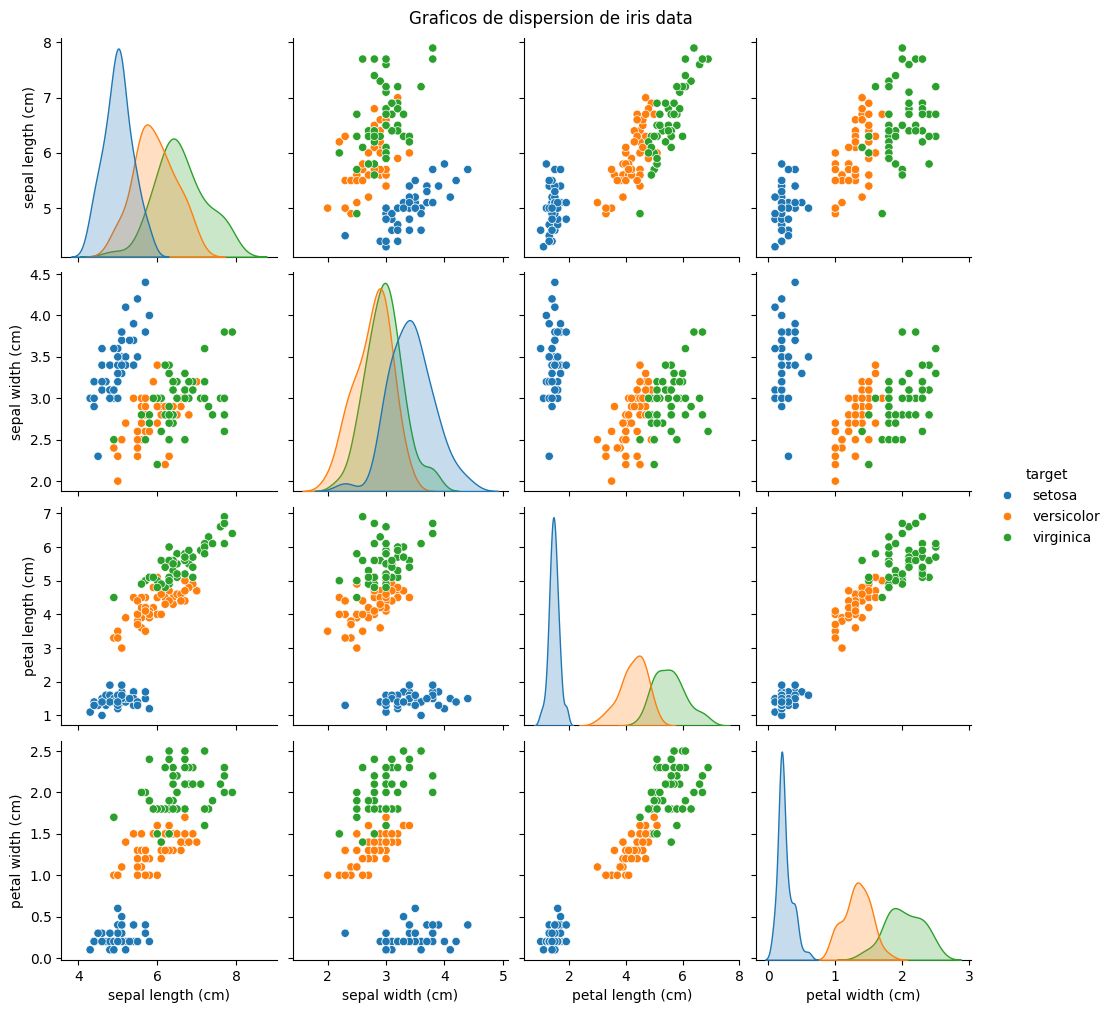

In [8]:
#config generica
plt.figure(figsize=(16, 10))
g = sns.pairplot(iris_df, hue='target')
g.fig.suptitle("Graficos de dispersion de iris data", y=1.01)


## Insight

* en casi todas las variables a revisar la flor setosa (azul tiene valores mas bajos que las demas)
* y la versicolor tiene valores intermedios en la comparativa


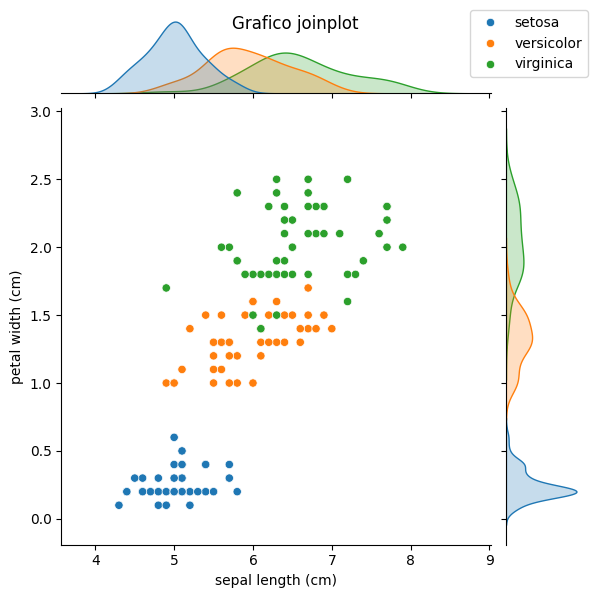

In [15]:
#ejemplo simple

p = sns.jointplot(data=iris_df, x="sepal length (cm)", y="petal width (cm)", hue='target')
p.fig.suptitle("Grafico joinplot")
#omito la legenda default
p.ax_joint.legend_._visible=False
p.fig.legend(bbox_to_anchor=(1, 1), loc=1)


# Graficos radar

Este estilo de graficos , srive mucho para comparar valores centrales de calculo como promedios etc

Lo que nos brinda un acomparativa excelente cuando tenemos un problema de multiclass como el de la flores de Iris

In [16]:
# gruopby sobre target


mean_iris_data = iris_df.groupby('target').median()
mean_iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [17]:
mean_iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [18]:
import plotly.graph_objects as go #graficos dinamicos

#seleccion de columns a chequear
columns = mean_iris_data.columns

#comienzo de lienzo en plotly
fig = go.Figure()

#primer grafico
fig.add_trace(go.Scatterpolar(
      r=list(mean_iris_data.loc['setosa']),
      theta=columns,
      fill='toself',
      name=iris.target_names[0]
))
#segundo grafico
fig.add_trace(go.Scatterpolar(
      r=list(mean_iris_data.loc['versicolor']),
      theta=columns,
      fill='toself',
      name=iris.target_names[1]
))
#tercer grafico
fig.add_trace(go.Scatterpolar(
      r=list(mean_iris_data.loc['virginica']),
      theta=columns,
      fill='toself',
      name=iris.target_names[2]
))

#output plot
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True,
  legend_title_text = "iris flores",
  margin=dict(l=0, r=0, t=20, b=20),
  title={
        'text': "Grafico radial de variables en iris data",
        'y':0.9,
        'x':0.05
         },
  legend=dict(
    yanchor="top",
    y=0.7,
    xanchor="right",
    x=0.15
)
)

fig.show()

## Insight




## Graficos 3d

In [19]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [20]:
import plotly.express as px

#grafico 3dimenseiones
fig = px.scatter_3d(iris_df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', size='petal width (cm)',
              color='target', opacity=0.8)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
        'text': "Grafico 3D de variables en iris data",
        'y':0.9,
        'x':0.05
         })
fig.show()

###Conclusiones




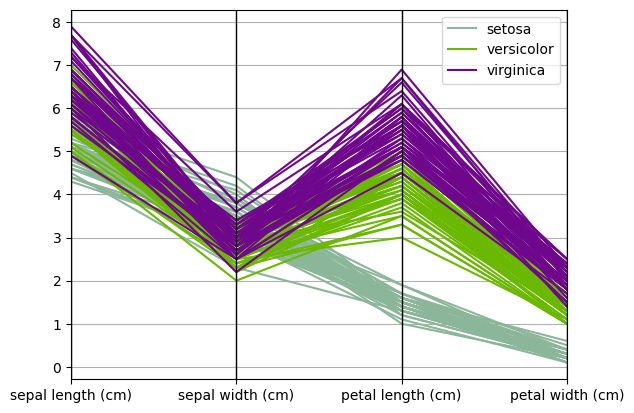

In [21]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris_df, "target");

Podemos afirmar que en sepal width las flores son casi todas del mismo tamano, y se puede ver la mayor diferencia en petal length

